### Import dependent libraries

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

### Load MNIST dataset and rescale it from [0: 255.0] to [0: 1.0]

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

#### Train set has 60,000 images with each image of size [28x28] (height, width)
#### while Test dataset has 10,000 images

In [3]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


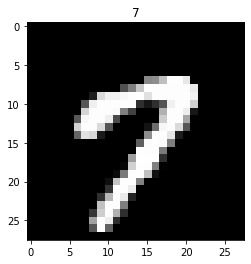

In [4]:
# plot one random image
plt.title(y_train[15])
plt.imshow(x_train[15].squeeze(), cmap="Greys_r")

### Build Network

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(192, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 192)               150720    
                                                                 
 dense_1 (Dense)             (None, 128)               24704     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 176,714
Trainable params: 176,714
Non-trainable params: 0
_________________________________________________________________


2022-07-11 07:53:35.460436: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
# function to view the probability of classification of digit
def view_classification(img, probs):
    fig, (ax1, ax2) = plt.subplots(figsize=(6,7), ncols=2)
    ax1.imshow(img)
    ax1.axis('off')
    ax2.barh(np.arange(10), probs)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10).astype(int), size='large');
    ax2.set_title('Probability')
    ax2.set_xlim(0, 1.1)

#### Testing the built network before training

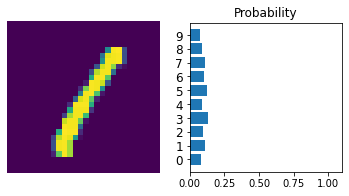

In [7]:
img = x_train[3:4, :]
logits = model(img)

# predict the class from the network output
prediction = tf.nn.softmax(logits).numpy()

view_classification(img[0], prediction[0])

### Back Propagation
We need to now train the network to adjust its weights by first calculating Cross Entropy Loss and then back propagating the error to adjust weights

In [8]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

#### Model compiling

In [9]:
model.compile(optimizer="adam",
              loss=loss_fn,
              metrics=["accuracy"])

#### Model Training

In [10]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2129 - accuracy: 0.9370
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0885 - accuracy: 0.9725
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0613 - accuracy: 0.9803
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0461 - accuracy: 0.9855
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0363 - accuracy: 0.9883
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0298 - accuracy: 0.9906
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0238 - accuracy: 0.9921
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0217 - accuracy: 0.9930
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0180 - accuracy: 0.9939
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.014

#### Check the prediction on the same image as the one used before training

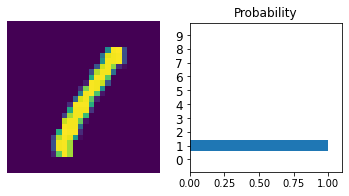

In [11]:
logits = model(img)

prediction = tf.nn.softmax(logits).numpy()

view_classification(img[0], prediction[0])